In [41]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/personality-prediction-data-introvert-extrovert/personality_dataset.xlsx
/kaggle/input/personality-prediction-data-introvert-extrovert/personality_dataset.csv


In [42]:
data = pd.read_csv("/kaggle/input/personality-prediction-data-introvert-extrovert/personality_dataset.csv")

In [43]:
print(data)

      Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0                    3        Yes                        6              7   
1                    2         No                        8              6   
2                    1         No                        9              4   
3                    8         No                        0              0   
4                    5        Yes                        3              0   
...                ...        ...                      ...            ...   
4995                 5         No                        6              5   
4996                 7         No                        2              3   
4997                 2         No                        7              3   
4998                 2        Yes                        9              3   
4999                 4        Yes                        6              7   

     Drained_after_socializing  Friends_circle_size  Post_frequency  \
0   

In [44]:
data.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [45]:
data.duplicated().sum()
data.drop_duplicates(inplace = True)


In [46]:
data.shape

(4872, 8)

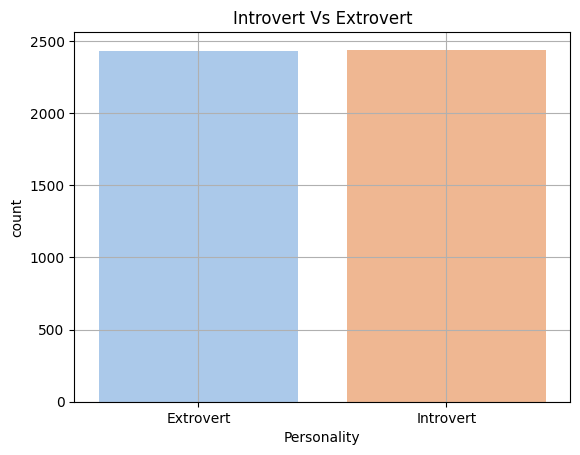

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ="Personality" , data = data , palette = "pastel")
plt.grid(True)
plt.title("Introvert Vs Extrovert")
plt.show()

<Axes: >

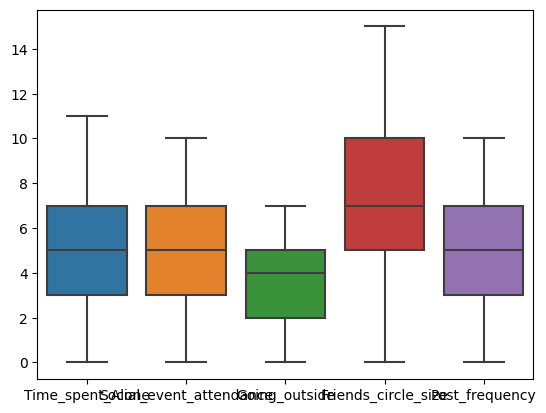

In [58]:
sns.boxplot(data)

<Axes: xlabel='Stage_fear', ylabel='count'>

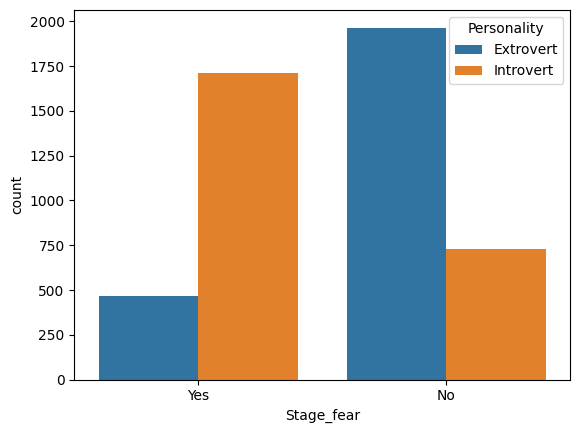

In [64]:
sns.countplot(x = "Stage_fear" ,hue = "Personality",data=data)

In [47]:
X=data.drop(columns=["Personality"])
y=data["Personality"]

In [48]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [65]:
le = LabelEncoder()
scaler = StandardScaler()

In [68]:
data["Stage_fear"]= le.fit_transform(data["Stage_fear"])
data['Drained_after_socializing'] = le.fit_transform(data['Drained_after_socializing'])
data['Personality'] = le.fit_transform(data['Personality'])

In [73]:
X = data.drop(columns = ["Personality"])
y = data["Personality"]


In [75]:
X_scaled = scaler.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [90]:
classifiers = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "K - Nearest Neightbors" : KNeighborsClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "Naive Bayes" : GaussianNB(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),             
    "LightGBM": LGBMClassifier(),           
    "CatBoost": CatBoostClassifier(verbose=0), 
    "MLP (Neural Net)": MLPClassifier(max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier()
}


In [92]:
results = []

for name , classi in classifiers.items():
    classi.fit(X_train , y_train)
    y_pred = classi.predict(X_test)

    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

[LightGBM] [Info] Number of positive: 1993, number of negative: 1904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 3897, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511419 -> initscore=0.045684
[LightGBM] [Info] Start training from score 0.045684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [94]:
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.995897,0.995526,0.995526,0.995526
1,Decision Tree,0.993846,0.993289,0.993289,0.993289
2,K - Nearest Neightbors,0.991795,0.991051,0.991051,0.991051
3,Logistic Regression,0.985641,0.984340,0.984340,0.984340
4,Naive Bayes,0.987692,0.986577,0.986577,0.986577
5,Support Vector Machine,0.985641,0.984340,0.984340,0.984340
6,Gradient Boosting,0.994872,0.995516,0.993289,0.994401
7,XGBoost,0.994872,0.993304,0.995526,0.994413
8,LightGBM,0.995897,0.995526,0.995526,0.995526
9,CatBoost,0.994872,0.993304,0.995526,0.994413


In [102]:
from lightgbm import LGBMClassifier

lgm = LGBMClassifier()
lgm.fit(X_train, y_train)

def predict_personality():
    print("Enter the following values:")
    Time_spent_Alone = int(input("Time spent alone (0-10): "))
    Stage_fear = input("Do you have stage fear? (Yes/No): ")
    Social_event_attendance = int(input("Social event attendance (0-10): "))
    Going_outside = int(input("Going outside (0-10): "))
    Drained_after_socializing = input("Do you feel drained after socializing? (Yes/No): ")
    Friends_circle_size = int(input("Friends circle size (0-20): "))
    Post_frequency = int(input("Social media post frequency (0-10): "))

    Stage_fear_encoded = 1 if Stage_fear.lower() == "yes" else 0
    Drained_encoded = 1 if Drained_after_socializing.lower() == "yes" else 0

    user_input = [
        Time_spent_Alone,
        Stage_fear_encoded,
        Social_event_attendance,
        Going_outside,
        Drained_encoded,
        Friends_circle_size,
        Post_frequency
    ]

    prediction = lgm.predict([user_input])[0]
    personality = "Extrovert" if prediction == 1 else "Introvert"
    print(f"\n🧠 Predicted Personality: {personality}")


[LightGBM] [Info] Number of positive: 1993, number of negative: 1904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 3897, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511419 -> initscore=0.045684
[LightGBM] [Info] Start training from score 0.045684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [103]:
predict_personality()

Enter the following values:


Time spent alone (0-10):  9
Do you have stage fear? (Yes/No):  NO
Social event attendance (0-10):  3
Going outside (0-10):  4
Do you feel drained after socializing? (Yes/No):  Yes
Friends circle size (0-20):  4
Social media post frequency (0-10):  0



🧠 Predicted Personality: Introvert


In [119]:
from skcriteria import mkdm
from skcriteria.madm.similarity import TOPSIS
from skcriteria.pipeline import mkpipe
from skcriteria.preprocessing import scalers, invert_objectives

# Convert your list of results into a DataFrame
df = pd.DataFrame(results)

# Data for TOPSIS
X = df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].values
models = df['Model'].values

# Create decision matrix safely
dm = mkdm(
    matrix=X,
    objectives=[max, max, max, max],
    weights=[1, 1, 1, 1],
    alternatives=models,
    criteria=['Accuracy', 'Precision', 'Recall', 'F1 Score']
)

# Build TOPSIS pipeline
pipe = mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.VectorScaler(target="matrix"),
    scalers.SumScaler(target="weights"),
    TOPSIS()
)

# Evaluate
res = pipe.evaluate(dm)

# Add results to DataFrame
df['TopsisScore'] = res.e_.similarity
df['TopsisRank'] = res.rank_ + 1

# Print sorted results
print(df.sort_values(by='TopsisRank'))

print("\n✅ Best Model by TOPSIS:", df.loc[df['TopsisRank'].idxmin(), 'Model'])


                     Model  Accuracy  Precision    Recall  F1 Score  \
0            Random Forest  0.995897   0.995526  0.995526  0.995526   
8                 LightGBM  0.995897   0.995526  0.995526  0.995526   
11                AdaBoost  0.995897   0.995526  0.995526  0.995526   
6        Gradient Boosting  0.994872   0.995516  0.993289  0.994401   
7                  XGBoost  0.994872   0.993304  0.995526  0.994413   
9                 CatBoost  0.994872   0.993304  0.995526  0.994413   
1            Decision Tree  0.993846   0.993289  0.993289  0.993289   
2   K - Nearest Neightbors  0.991795   0.991051  0.991051  0.991051   
12                     KNN  0.991795   0.991051  0.991051  0.991051   
4              Naive Bayes  0.987692   0.986577  0.986577  0.986577   
3      Logistic Regression  0.985641   0.984340  0.984340  0.984340   
5   Support Vector Machine  0.985641   0.984340  0.984340  0.984340   
10        MLP (Neural Net)  0.984615   0.982143  0.984340  0.983240   

    T

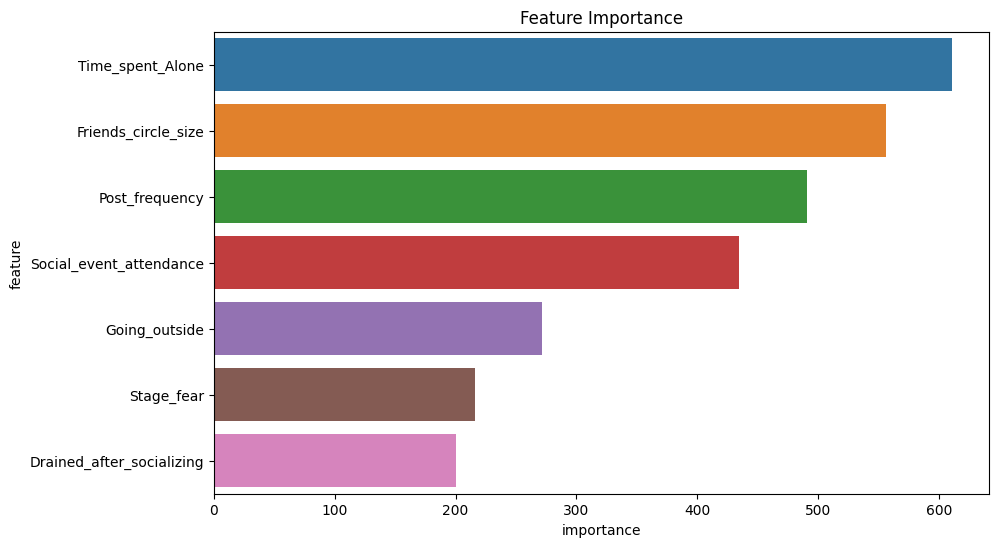

In [110]:

rf_model = classifiers['LightGBM']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
!pip install scikit-criteria


In [120]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


input_dim = X_train.shape[1]  

# Build model
model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)


2025-06-14 08:37:54.752097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749890275.093293      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749890275.195393      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-14 08:38:13.542954: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8643 - loss: 0.3732 - precision: 0.8284 - recall: 0.9577 - val_accuracy: 0.9846 - val_loss: 0.0399 - val_precision: 0.9868 - val_recall: 0.9817
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9893 - loss: 0.0313 - precision: 0.9887 - recall: 0.9902 - val_accuracy: 0.9846 - val_loss: 0.0361 - val_precision: 0.9843 - val_recall: 0.9843
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0272 - precision: 0.9950 - recall: 0.9917 - val_accuracy: 0.9885 - val_loss: 0.0343 - val_precision: 0.9921 - val_recall: 0.9843
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9891 - loss: 0.0301 - precision: 0.9887 - recall: 0.9905 - val_accuracy: 0.9846 - val_loss: 0.0405 - val_precision: 0.9843 - val_recall: 0.9843
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9894 - loss: 0.0302 - precision: 0.9903 - recall: 0.9893 - val_accuracy: 0.9885 - val_loss: 0.0367 - val_preci

In [121]:
# Evaluate on test data
loss, acc, prec, rec = model.evaluate(X_test, y_test)
print(f"\n🔍 Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0401 - precision: 0.9777 - recall: 0.9855

🔍 Accuracy: 0.9856 | Precision: 0.9843 | Recall: 0.9843
